<a href="https://colab.research.google.com/github/wcaraker76/4GeeksProjects/blob/main/AutoEncoder_with_IMG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import what we will need for the project
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os

#make the output stable
np.random.seed(42)

#import the plotting packages
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [34]:
#use the Fashion MNIST dataset 

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
#normalize the data
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [38]:
keras.backend.clear_session

<function keras.backend.clear_session>

In [39]:
np.random.seed(42)
tf.random.set_seed(42)

# input vector (flatten image)
input_img = keras.Input(shape=[784])

# Encoder layers (excluding output layer) 
e_hidden_1 = keras.layers.Dense(300, activation='relu')(input_img)
encoded = keras.layers.Dense(100, activation='relu')(e_hidden_1) #encode down to shape[100] from [784]

# Decoder layers
d_hidden_1 = keras.layers.Dense(300, activation='relu')(encoded)
decoded = keras.layers.Dense(784, activation='sigmoid')(d_hidden_1) #decode the shape back up to [784]

# Autoencoder model
autoencoder = keras.Model(inputs=[input_img], outputs=[decoded]) 

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 300)               30300     
                                                                 
 dense_12 (Dense)            (None, 784)               235984    
                                                                 
Total params: 531,884
Trainable params: 531,884
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.compile(loss='mean_squared_error', 
                    optimizer = keras.optimizers.Nadam()) #encode using Nadam because it does a better job

In [41]:
#didn't use a flattening layer so flatten everything
X_flatten = X_train_full.reshape(-1, 784)
X_valid_flatten = X_valid.reshape(-1, 784)
(X_flatten.shape, X_valid_flatten.shape)

((60000, 784), (5000, 784))

In [42]:
fashion = autoencoder.fit(X_flatten, X_flatten, epochs=30,
                    validation_data=(X_valid_flatten, X_valid_flatten))

Epoch 1/30
1875/1875 [==============================] - 26s 13ms/step - loss: 0.0205 - val_loss: 0.0125
Epoch 2/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 3/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0094 - val_loss: 0.0083
Epoch 4/30
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 5/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 6/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 7/30
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 8/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 9/30
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 10/30
1875/1875 [==============================] - 24s 13m

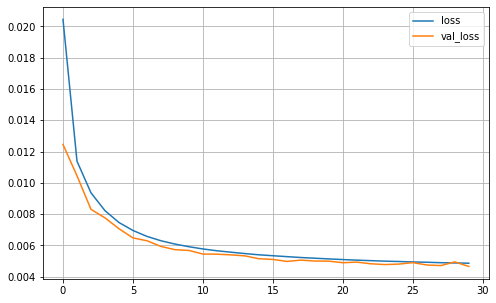

In [43]:
pd.DataFrame(fashion.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [44]:
#add a softmax layer on top of the encoder and freeze the layers so that it retains the data it learned previous 

# Adding the softmax layer on top of the encoder
cls_output = keras.layers.Dense(10, activation="softmax")(encoded)

# Creating the classification model
model = keras.Model(inputs=[input_img], outputs=[cls_output])

# Freeze the layers
e_hidden_1.trainable = False
encoded.trainable = False

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [46]:
X_flatten = X_train.reshape(-1, 784)
X_flatten.shape

(55000, 784)

In [47]:
y_valid.shape

(5000,)

In [27]:
keras.backend.clear_session

<function keras.backend.clear_session>

In [48]:
fashion_model = model.fit(X_flatten, y_train, epochs=30,
                    validation_data=(X_valid_flatten, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.9968 - accuracy: 0.6573 - val_loss: 0.6664 - val_accuracy: 0.7688
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6223 - accuracy: 0.7801 - val_loss: 0.5599 - val_accuracy: 0.8012
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8064 - val_loss: 0.5182 - val_accuracy: 0.8138
Epoch 4/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5105 - accuracy: 0.8198 - val_loss: 0.4814 - val_accuracy: 0.8288
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4863 - accuracy: 0.8282 - val_loss: 0.4606 - val_accuracy: 0.8394
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4686 - accuracy: 0.8341 - val_loss: 0.4473 - val_accuracy: 0.8454
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4552 - accuracy: 0.8397 - val_loss: 0.4367 - val_accuracy:

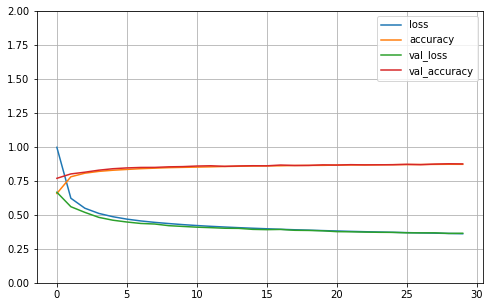

In [49]:
pd.DataFrame(fashion_model.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [50]:
#view how the model started with the images vs the one it used 
idx = [np.where(y_test==c)[0][0] for c in range(10)]
origin_images = X_valid_flatten[idx]
reconst_images = autoencoder.predict(origin_images)

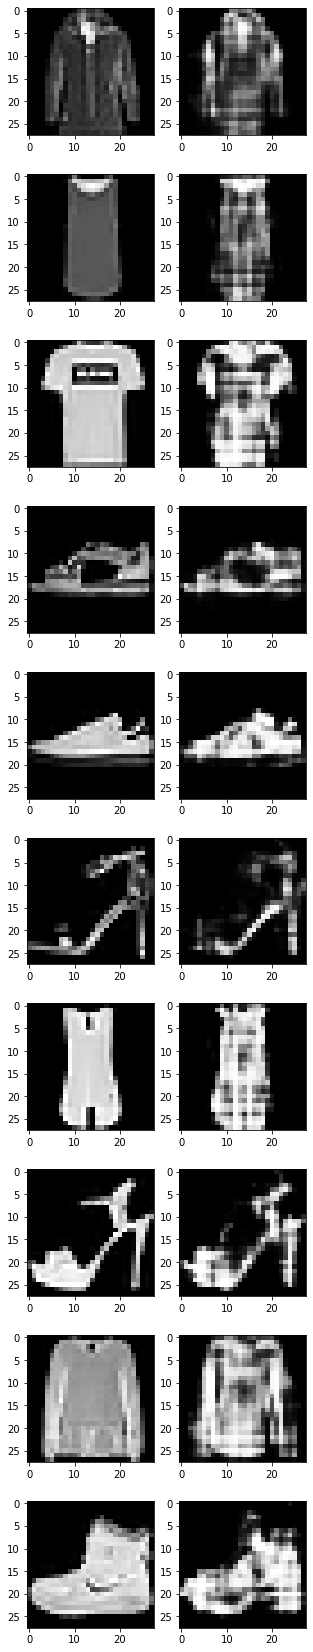

In [51]:
#plot the before on the right and the after on the left in grey scale
plt.figure(figsize=(5,30)) #set the figure size
for i in range(10): #loop to put them beside each other on the table. 
    plt.subplot(10,2,i*2+1)
    plt.imshow(origin_images[i].reshape(28,28), cmap="gray")
    plt.subplot(10,2,i*2+2)
    plt.imshow(reconst_images[i].reshape(28,28), cmap="gray")
plt.show()